In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
import glob

In [124]:
raw_data_path = os.path.join('data', 'raw')
all_files = glob.glob(raw_data_path +"/prov_top_songs_with_lyrics.csv")
lyrics_df = pd.concat(pd.read_csv(f) for f in all_files)
#tweets_df = pd.read_csv('data/raw/top_songs_with_lyrics.csv', encoding = 'latin1')
columnLyric='lyric'

In [125]:
lyrics_df = lyrics_df[lyrics_df[columnLyric].isnull()==False]


PREPROCESING

In [126]:
!pip3 install es_core_news_md
!python -m spacy download es_core_news_md
#import spacy
#nlp = spacy.load('es_core_news_md')

  ERROR: Could not find a version that satisfies the requirement es_core_news_md (from versions: none)
ERROR: No matching distribution found for es_core_news_md
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [127]:
import re
import string

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')

import es_core_news_md

nlp = es_core_news_md.load()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leobardomorales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leobardomorales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
import spacy
import es_core_news_md

nlp = es_core_news_md.load()
#doc = nlp("ahora todo cambió le toca a ella latino gang  ayer la vi perreando solita  se ve má bonita ahora que no está")
#for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)

In [129]:
## Agregar Lematizacion o Stemming 
## Agregar remover acentos 
## completar lista de stop words 

def lemmatize(lyric):
    tk = nlp(lyric)
    tk_lemmatize = ""
    for word in tk:
        tk_lemmatize = tk_lemmatize +" "+word.lemma_
    return tk_lemmatize
    

def token_clean_stopwords(message):
    stop_words = stopwords.words('spanish') + stopwords.words('english')
    more_stopwords = ['rhythm','ovy','ay','hey','woh','si', 'pa', 'sé', 'solo', 'yeah', 'yeh', 'oh', 'i', 'to', 'va', 'the', 'aunque', 'you', 'eh', 'cómo','ma']
    total_stopwords = stop_words + more_stopwords
    text_token_stopwords = [word for word in message.split() if ((word.lower() not in total_stopwords) and (len(word)>4))]
    #    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('spanish')]


    return text_token_stopwords

def remove_puntuation(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join = remove_accents(Test_punc_removed_join)
    return Test_punc_removed_join

def remove_accents(input_str):
    """
    remueve acentos, aunque al ser un texto en inglés no deberían existir acentos
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str )
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def clean_str_puntuaction(input_df):
    input_df=input_df.replace("'","")
    input_df=input_df.replace("\r"," ")
    input_df=input_df.replace("\n"," ")
    input_df=input_df.replace("-"," ")
    input_df= re.sub("[\(\[].*?[\)\]]", "", input_df)
    input_df= re.sub(r'[^\w\s]', '', input_df)
    #input_df= remove_accents(input_df)
    return input_df

def clean_lyric(input_lyric):
    input_lyric = clean_str_puntuaction(input_lyric)
    #input_lyric = remove_puntuation(input_lyric)
    
    input_lyric = lemmatize(input_lyric)
    
    input_lyric = remove_accents(input_lyric)
    
    input_lyric = token_clean_stopwords(input_lyric)
    
    
    return input_lyric
    
    

# Vectorizar texto sin preprocesar

In [130]:
# Texto sin preprocesar
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = clean_lyric)
lyrics_countvectorizer = vectorizer.fit_transform(lyrics_df['lyric'])

In [131]:
print(vectorizer.get_feature_names())

['Abranle', 'Abusa', 'Aceptalo', 'Aclaremos', 'Acompaname', 'Acordando', 'Acostumbrado', 'Acostumbrandome', 'Acura', 'Adentro', 'Adida', 'Admitelo', 'Adoro', 'Afortunado', 'Agradecido', 'Agradezco', 'Aguantate', 'Ahora', 'Alann', 'Alaska', 'Alguien', 'Algun', 'Amenaza', 'Amigos', 'Amistades', 'Analizando', 'Andamo', 'Andando', 'Angeles', 'Animate', 'Anitta', 'Anoche', 'Anton', 'Aparentemente', 'Apenas', 'Aplicamos', 'Apoco', 'Aposte', 'Aprendi', 'Aprendimos', 'Apuesto', 'Aquel', 'Aquella', 'Aquellas', 'Aquellos', 'Arcangel', 'Arriba', 'Arturo', 'Aullando', 'Avanzan', 'Aviso', 'Azules', 'BUSCO', 'Baila', 'Bailamos', 'Bailando', 'Bajale', 'Balvin', 'Barquillero', 'Batalle', 'Beach', 'Bebecita', 'Beber', 'Bebiendo', 'Bella', 'Benji', 'Besando', 'Bienvenidos', 'Blanca', 'Bloods', 'Bohemia', 'Brasil', 'Bravo', 'Brinca', 'Burlesco', 'Busca', 'Buscaras', 'CUATRO', 'Cabron', 'Cachetes', 'California', 'Callaita', 'Callao', 'Callate', 'Cambio', 'Caminando', 'Camine', 'Caminen', 'Camino', 'Canelo

In [132]:
print(lyrics_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Ejecutar desde aquí 

In [133]:

lyrics = pd.DataFrame(lyrics_countvectorizer.toarray())

lyrics.reset_index(drop=True, inplace=True)


In [134]:
X = lyrics

In [135]:
X.shape


(412, 3035)

In [136]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:

y=lyrics_df['clase']


In [138]:
y.shape

(412,)

In [139]:
#Dividir el dataset en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Funcion mostrar resultados

In [150]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()
    print (classification_report(y_test, pred_y))

# Probar distintos Algoritmos

# Naive Bayes

In [162]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB(alpha=3.0, class_prior=None, fit_prior=False)
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=3.0, class_prior=None, fit_prior=False)

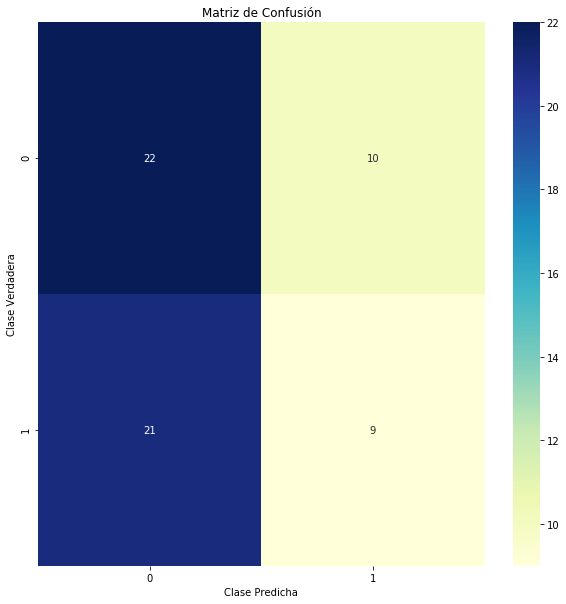

              precision    recall  f1-score   support

           0       0.51      0.69      0.59        32
           1       0.47      0.30      0.37        30

    accuracy                           0.50        62
   macro avg       0.49      0.49      0.48        62
weighted avg       0.49      0.50      0.48        62



In [163]:
# Cambiar nombre del clasificador
y_predict_test = NB_classifier.predict(X_test)
mostrar_resultados(y_test, y_predict_test)


# Random Forest

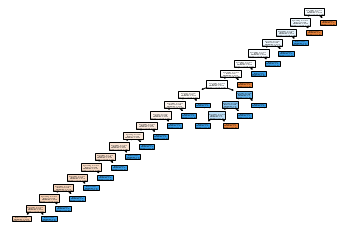

In [153]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

rndmf = RandomForestClassifier(max_depth= 20, random_state= 0)
rndmf= rndmf.fit(X_train, y_train)
tree.plot_tree(rndmf.estimators_[9], filled = True)
plt.show()

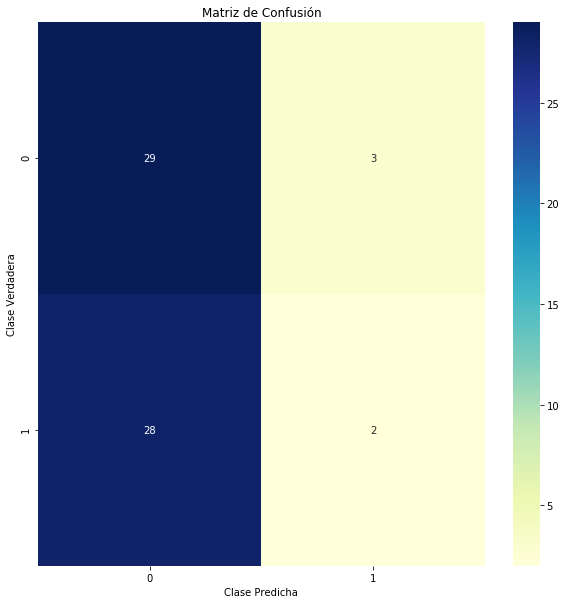

              precision    recall  f1-score   support

           0       0.51      0.91      0.65        32
           1       0.40      0.07      0.11        30

    accuracy                           0.50        62
   macro avg       0.45      0.49      0.38        62
weighted avg       0.46      0.50      0.39        62



In [154]:
y_predict_test = rndmf.predict(X_test)
mostrar_resultados(y_test, y_predict_test)


# Decision Tree 

In [155]:
# Poner algoritmo aqui
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = tree.DecisionTreeClassifier(criterion='gini',
                                   #min_samples_split=20,
                                   min_samples_leaf=5,
                                   max_depth = 30,
                                   class_weight={1:4})
tree = tree.fit(X_train, y_train)

#tree.plot_tree(arbol, filled= True)
#plt.show()


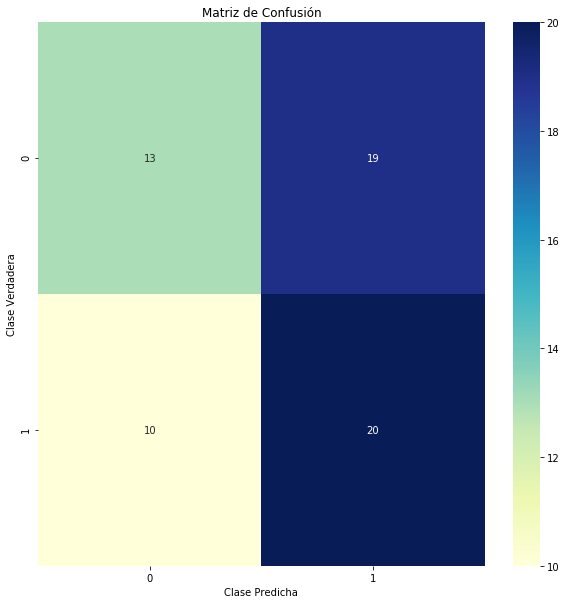

              precision    recall  f1-score   support

           0       0.57      0.41      0.47        32
           1       0.51      0.67      0.58        30

    accuracy                           0.53        62
   macro avg       0.54      0.54      0.53        62
weighted avg       0.54      0.53      0.52        62



In [156]:
y_predict_test = tree.predict(X_test)
mostrar_resultados(y_test, y_predict_test)

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=200, random_state=0, n_estimators=200)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

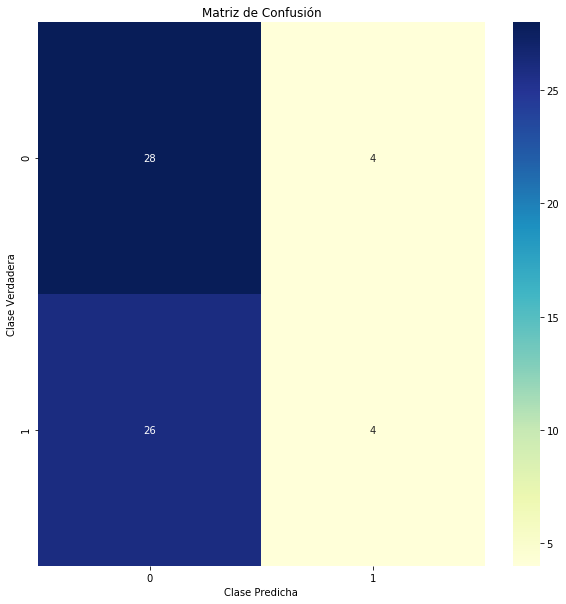

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        32
           1       0.50      0.13      0.21        30

    accuracy                           0.52        62
   macro avg       0.51      0.50      0.43        62
weighted avg       0.51      0.52      0.44        62



In [158]:
y_predict_test = clf.predict(X_test)
mostrar_resultados(y_test, y_predict_test)

In [164]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

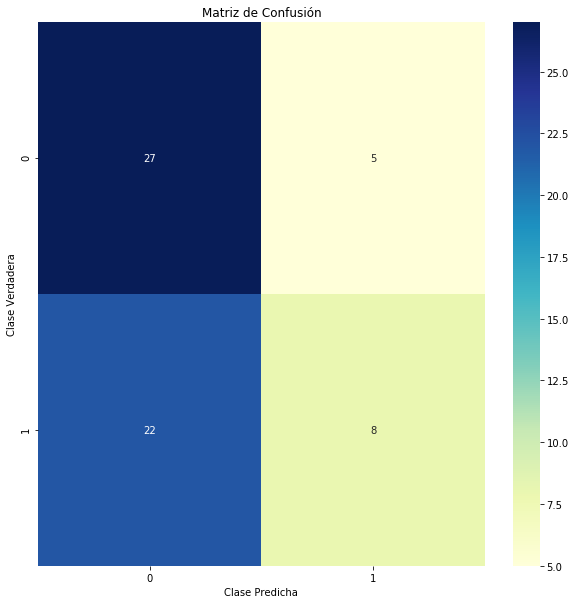

              precision    recall  f1-score   support

           0       0.55      0.84      0.67        32
           1       0.62      0.27      0.37        30

    accuracy                           0.56        62
   macro avg       0.58      0.56      0.52        62
weighted avg       0.58      0.56      0.52        62



In [165]:
y_predict_test = clf.predict(X_test)
mostrar_resultados(y_test, y_predict_test)

In [166]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

/Users/leobardomorales/miniconda3/envs/actumlogos-cpu/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

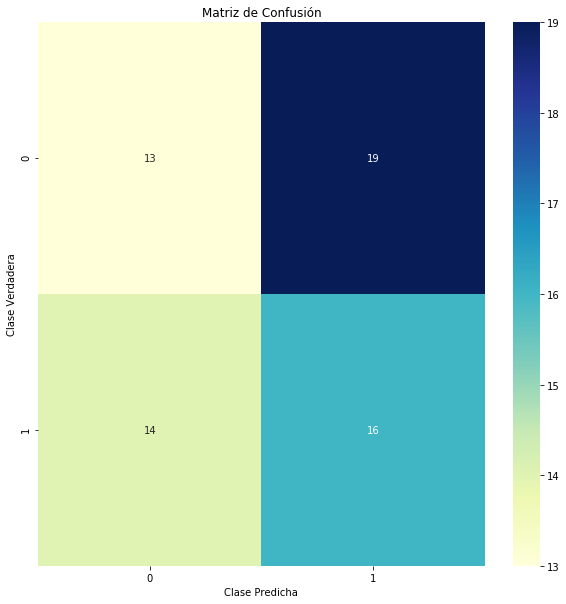

              precision    recall  f1-score   support

           0       0.48      0.41      0.44        32
           1       0.46      0.53      0.49        30

    accuracy                           0.47        62
   macro avg       0.47      0.47      0.47        62
weighted avg       0.47      0.47      0.47        62



In [167]:
y_predict_test = clf.predict(X_test)
mostrar_resultados(y_test, y_predict_test)